## Latar Belakang
Layanan taksi di kota-kota besar, seperti New York City (NYC), memainkan peran penting dalam transportasi harian penduduk dan wisatawan. Dalam industri ini, terdapat beberapa vendor yang menawarkan layanan serupa namun memiliki perbedaan dalam performa dan kualitas layanan. Untuk memahami dan meningkatkan layanan, analisis performa vendor sangat penting.

## Pernyataan Masalah
Apakah terdapat perbedaan signifikan dalam performa perjalanan antara dua penyedia layanan LPEP di NYC? Performa perjalanan dapat diukur dari beberapa aspek, termasuk durasi perjalanan, jarak perjalanan, jumlah penumpang, total jumlah yang dikenakan kepada penumpang, dan metode pembayaran yang digunakan.


## Data
Untuk menjawab masalah diatas, kita akan menganalisa data perjalanan Taxi di New York City yang sudah dikumpulkan. Dataset dapat diakses [di sini](https://drive.google.com/drive/folders/1NYHIL-RgVPW-HONz4pdzlcbIChF-c37N)

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind
import warnings
warnings.filterwarnings("ignore")

Ada 20 kolom dalam dataset NYC TLC Trip Record, Detail kolom tersebut dapat diakses
[di sini](https://drive.google.com/drive/folders/1NYHIL-RgVPW-HONz4pdzlcbIChF-c37N)

Berikut 5 baris teratas dari dataset NYC TLC Trip Record

In [6]:
readCSV = pd.read_csv("NYC TLC Trip Record.csv")
df = pd.DataFrame(readCSV)
df.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,NaN,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,NaN,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,1.0,0.5,1.94,0.0,NaN,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,0.5,1.5,1.70,0.0,NaN,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,0.5,1.5,0.00,0.0,NaN,1.0,8.00,1.0,1.0,0.00


## Data Cleaning
Tahap pertama yaitu mengecek informasi pada dataset tersebut seperti berapa banyak kolom dan baris serta nama-namanya

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68211 entries, 0 to 68210
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               68211 non-null  int64  
 1   lpep_pickup_datetime   68211 non-null  object 
 2   lpep_dropoff_datetime  68211 non-null  object 
 3   store_and_fwd_flag     63887 non-null  object 
 4   RatecodeID             63887 non-null  float64
 5   PULocationID           68211 non-null  int64  
 6   DOLocationID           68211 non-null  int64  
 7   passenger_count        63887 non-null  float64
 8   trip_distance          68211 non-null  float64
 9   fare_amount            68211 non-null  float64
 10  extra                  68211 non-null  float64
 11  mta_tax                68211 non-null  float64
 12  tip_amount             68211 non-null  float64
 13  tolls_amount           68211 non-null  float64
 14  ehail_fee              0 non-null      float64
 15  im

In [8]:
missing_values = df.isnull().sum()
print(missing_values)

VendorID                     0
lpep_pickup_datetime         0
lpep_dropoff_datetime        0
store_and_fwd_flag        4324
RatecodeID                4324
PULocationID                 0
DOLocationID                 0
passenger_count           4324
trip_distance                0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
ehail_fee                68211
improvement_surcharge        0
total_amount                 0
payment_type              4324
trip_type                 4334
congestion_surcharge      4324
dtype: int64


In [9]:
pd.set_option('display.max_colwidth', 1)
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,VendorID,2,"[2, 1]"
1,lpep_pickup_datetime,66575,"[2023-01-01 00:26:10, 2023-01-01 00:51:03, 2023-01-01 00:35:12, 2023-01-01 00:13:14, 2023-01-01 00:33:04, 2023-01-01 00:53:31, 2023-01-01 00:09:14, 2023-01-01 00:11:58, 2023-01-01 00:41:29, 2023-01-01 00:50:32, 2023-01-01 00:16:12, 2023-01-01 00:08:43, 2023-01-01 00:26:32, 2023-01-01 00:18:35, 2023-01-01 00:39:32, 2023-01-01 00:49:34, 2023-01-01 00:10:45, 2023-01-01 00:35:11, 2023-01-01 00:31:06, 2023-01-01 00:14:37, 2023-01-01 00:26:21, 2023-01-01 00:41:56, 2023-01-01 00:32:02, 2023-01-01 00:55:13, 2023-01-01 00:01:31, 2023-01-01 00:22:31, 2023-01-01 00:57:28, 2023-01-01 00:35:21, 2023-01-01 00:52:52, 2023-01-01 00:32:56, 2023-01-01 00:24:01, 2023-01-01 00:46:48, 2023-01-01 00:40:58, 2023-01-01 00:20:23, 2023-01-01 01:49:24, 2023-01-01 00:41:53, 2023-01-01 00:56:26, 2023-01-01 00:33:10, 2023-01-01 00:58:28, 2023-01-01 00:42:49, 2023-01-01 00:48:21, 2023-01-01 00:08:05, 2023-01-01 00:13:47, 2023-01-01 00:16:10, 2023-01-01 00:04:25, 2023-01-01 00:33:38, 2023-01-01 00:46:08, 2023-01-01 01:00:08, 2023-01-01 00:28:04, 2023-01-01 00:23:04, 2023-01-01 00:34:07, 2023-01-01 00:52:03, 2023-01-01 00:25:31, 2023-01-01 00:53:09, 2023-01-01 00:42:37, 2023-01-01 00:39:52, 2023-01-01 00:15:32, 2023-01-01 00:06:48, 2023-01-01 00:57:15, 2023-01-01 00:14:13, 2023-01-01 00:52:48, 2023-01-01 00:34:13, 2023-01-01 00:44:41, 2023-01-01 00:11:12, 2023-01-01 01:44:43, 2023-01-01 01:04:44, 2023-01-01 01:48:11, 2023-01-01 01:11:39, 2023-01-01 01:54:25, 2023-01-01 01:59:10, 2023-01-01 01:22:35, 2023-01-01 01:37:10, 2023-01-01 01:46:22, 2023-01-01 01:59:48, 2023-01-01 01:09:49, 2023-01-01 01:23:35, 2023-01-01 01:53:20, 2023-01-01 01:32:14, 2023-01-01 01:01:05, 2023-01-01 01:34:41, 2023-01-01 01:52:08, 2023-01-01 01:49:28, 2023-01-01 01:03:59, 2023-01-01 01:13:11, 2023-01-01 01:40:06, 2023-01-01 01:33:50, 2023-01-01 01:45:19, 2023-01-01 01:51:29, 2023-01-01 01:34:07, 2023-01-01 01:10:08, 2023-01-01 01:32:17, 2023-01-01 01:48:28, 2023-01-01 01:30:43, 2023-01-01 01:51:10, 2023-01-01 01:09:36, 2023-01-01 01:19:54, 2023-01-01 01:31:10, 2023-01-01 01:42:30, 2023-01-01 00:57:51, 2023-01-01 01:27:36, ...]"
2,lpep_dropoff_datetime,66519,"[2023-01-01 00:37:11, 2023-01-01 00:57:49, 2023-01-01 00:41:32, 2023-01-01 00:19:03, 2023-01-01 00:39:02, 2023-01-01 01:11:04, 2023-01-01 00:26:39, 2023-01-01 00:24:55, 2023-01-01 00:46:26, 2023-01-01 01:13:42, 2023-01-01 00:41:43, 2023-01-01 00:17:08, 2023-01-01 00:45:31, 2023-01-01 00:30:09, 2023-01-01 01:18:06, 2023-01-01 01:08:23, 2023-01-01 00:19:37, 2023-01-01 01:17:35, 2023-01-01 00:42:23, 2023-01-01 00:21:50, 2023-01-01 00:30:26, 2023-01-01 00:46:06, 2023-01-01 00:41:25, 2023-01-01 00:59:47, 2023-01-01 00:16:02, 2023-01-01 00:39:24, 2023-01-01 01:09:31, 2023-01-01 00:53:49, 2023-01-01 01:00:53, 2023-01-01 00:42:53, 2023-01-01 00:32:05, 2023-01-01 01:08:17, 2023-01-01 01:04:32, 2023-01-01 00:24:32, 2023-01-01 01:57:51, 2023-01-01 00:41:58, 2023-01-01 01:14:41, 2023-01-01 00:43:08, 2023-01-01 01:14:46, 2023-01-01 00:51:53, 2023-01-01 01:23:50, 2023-01-01 00:13:26, 2023-01-01 00:25:57, 2023-01-01 00:54:55, 2023-01-01 00:17:50, 2023-01-01 00:38:51, 2023-01-01 00:59:10, 2023-01-01 01:05:46, 2023-01-01 00:43:45, 2023-01-01 23:18:32, 2023-01-01 00:50:01, 2023-01-01 00:57:56, 2023-01-01 00:38:40, 2023-01-01 01:13:35, 2023-01-01 00:47:15, 2023-01-01 00:48:54, 2023-01-01 00:23:03, 2023-01-01 01:08:47, 2023-01-01 01:00:15, 2023-01-01 00:25:43, 2023-01-01 01:21:19, 2023-01-01 00:43:57, 2023-01-01 00:48:26, 2023-01-01 00:38:12, 2023-01-01 01:57:31, 2023-01-01 01:11:23, 2023-01-01 02:05:51, 2023-01-01 01:41:21, 2023-01-01 02:05:19, 2023-01-01 02:11:36, 2023-01-01 01:25:11, 2023-01-01 01:41:30, 2023-01-01 02:04:14, 2023-01-01 02:05:29, 2023-01-01 01:17:55, 2023-01-01 01:53:43, 2023-01-01 02:27:01, 2023-01-01 01:43:55, 2023-01-01 01:13:02, 2023-01-01 02:00:06, 2023-01-01 02:00:57, 2023-01-01 02:13:18, 2023-01-01 01:07:17, 2023-01-01 01:26:01, 2

Terlihat bahwa terdapat missing value di beberapa kolom yaitu, `store_and_fwd_flag` ,`RatecodeID`, `passenger_count`, `ehail_fee`, `payment_type`, `trip_type`, `congestion_surcharge`.


In [10]:
df.isna().sum()/df.shape[0]*100

VendorID                 0.000000  
lpep_pickup_datetime     0.000000  
lpep_dropoff_datetime    0.000000  
store_and_fwd_flag       6.339154  
RatecodeID               6.339154  
PULocationID             0.000000  
DOLocationID             0.000000  
passenger_count          6.339154  
trip_distance            0.000000  
fare_amount              0.000000  
extra                    0.000000  
mta_tax                  0.000000  
tip_amount               0.000000  
tolls_amount             0.000000  
ehail_fee                100.000000
improvement_surcharge    0.000000  
total_amount             0.000000  
payment_type             6.339154  
trip_type                6.353814  
congestion_surcharge     6.339154  
dtype: float64

Karena missing value pada kolom `store_and_fwd_flag` ,`RatecodeID`, `passenger_count`, `payment_type`, `trip_type`, `congestion_surcharge` memiliki persentase dibawah 10% maka baris yang terdapat missing value dapat dihapus> Sedangkan pada `ehail_fee` 100% missing value maka dapat dihapus saja kolom nya

In [11]:
df = df.drop(columns=['ehail_fee'])

Lalu lakukan pengisian data kosong sesuai kategori kolom nya seperti numerik akan diisi median dan kategori akan diisi mode


In [12]:
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].median())

In [13]:
categorical_columns = df.select_dtypes(include=['object']).columns
df[categorical_columns] = df[categorical_columns].apply(lambda x: x.fillna(x.mode()[0]))

In [14]:
missing_values_after = df.isnull().sum()
print("Missing values after imputation:\n", missing_values_after)

Missing values after imputation:
 VendorID                 0
lpep_pickup_datetime     0
lpep_dropoff_datetime    0
store_and_fwd_flag       0
RatecodeID               0
PULocationID             0
DOLocationID             0
passenger_count          0
trip_distance            0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
payment_type             0
trip_type                0
congestion_surcharge     0
dtype: int64


Lalu terdapat perjalanan yang memiliki penumpang 0 dan jarak 0 maka akan dikecualikan

In [15]:
df = df[(df['trip_distance'] > 0) & (df['passenger_count'] > 0)]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64563 entries, 0 to 68210
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               64563 non-null  int64  
 1   lpep_pickup_datetime   64563 non-null  object 
 2   lpep_dropoff_datetime  64563 non-null  object 
 3   store_and_fwd_flag     64563 non-null  object 
 4   RatecodeID             64563 non-null  float64
 5   PULocationID           64563 non-null  int64  
 6   DOLocationID           64563 non-null  int64  
 7   passenger_count        64563 non-null  float64
 8   trip_distance          64563 non-null  float64
 9   fare_amount            64563 non-null  float64
 10  extra                  64563 non-null  float64
 11  mta_tax                64563 non-null  float64
 12  tip_amount             64563 non-null  float64
 13  tolls_amount           64563 non-null  float64
 14  improvement_surcharge  64563 non-null  float64
 15  total_a

## Data Analysis


Lakukan penambahan kolom durasi perjalanan dengan mendapatkan selisih `lpep_pickup_datetime` dengan `lpep_dropoff_datetime` dan menjaidkan kolom baru bernama `trip_duration` dalam hitungan menit

In [16]:
df['lpep_pickup_datetime'] = pd.to_datetime(df['lpep_pickup_datetime'])

df['lpep_dropoff_datetime'] = pd.to_datetime(df['lpep_dropoff_datetime'])

df['trip_duration'] = (df['lpep_dropoff_datetime'] - df['lpep_pickup_datetime']).dt.total_seconds() / 60
df.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,trip_duration
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,1.0,24.18,1.0,1.0,2.75,11.016667
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,1.0,15.84,1.0,1.0,0.00,6.766667
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,0.5,1.5,1.70,0.0,1.0,10.20,1.0,1.0,0.00,5.816667
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,0.5,1.5,0.00,0.0,1.0,8.00,1.0,1.0,0.00,5.966667
5,2,2023-01-01 00:53:31,2023-01-01 01:11:04,N,1.0,41,262,1.0,2.78,17.7,1.0,0.5,0.00,0.0,1.0,22.95,2.0,1.0,2.75,17.550000


In [27]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Menghapus outlier dari kolom 'Trip_distance'
df = remove_outliers(df, 'trip_distance')

# Menghapus outlier dari kolom 'Total_amount'
df = remove_outliers(df, 'total_amount')

# Menghapus outlier dari kolom 'trip_duration'
df = remove_outliers(df, 'trip_duration')


# Menampilkan informasi data setelah menghapus outlier
print(df.info())


<class 'pandas.core.frame.DataFrame'>
Index: 50698 entries, 0 to 68209
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               50698 non-null  int64         
 1   lpep_pickup_datetime   50698 non-null  datetime64[ns]
 2   lpep_dropoff_datetime  50698 non-null  datetime64[ns]
 3   store_and_fwd_flag     50698 non-null  object        
 4   RatecodeID             50698 non-null  float64       
 5   PULocationID           50698 non-null  int64         
 6   DOLocationID           50698 non-null  int64         
 7   passenger_count        50698 non-null  float64       
 8   trip_distance          50698 non-null  float64       
 9   fare_amount            50698 non-null  float64       
 10  extra                  50698 non-null  float64       
 11  mta_tax                50698 non-null  float64       
 12  tip_amount             50698 non-null  float64       
 13  tolls_

In [28]:
kolomNumerik = [ 'trip_distance', 'total_amount','trip_duration']

Q1 = df[kolomNumerik].quantile(0.25)
Q3 = df[kolomNumerik].quantile(0.75)
IQR = Q3 - Q1
outliers = ((df[kolomNumerik] < (Q1 - 1.5 * IQR)) | (df[kolomNumerik] > (Q3 + 1.5 * IQR)))
print( outliers.sum())


trip_distance    0
total_amount     0
trip_duration    0
dtype: int64


In [29]:
VendorID1 = df[df['VendorID'] == 1]
VendorID2 = df[df['VendorID'] == 2]
display(VendorID1.head())
display(VendorID2.head())

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,trip_duration
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.3,6.5,0.50,1.5,1.70,0.0,1.0,10.20,1.0,1.0,0.00,5.816667
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.1,6.0,0.50,1.5,0.00,0.0,1.0,8.00,1.0,1.0,0.00,5.966667
6,1,2023-01-01 00:09:14,2023-01-01 00:26:39,N,1.0,181,45,2.0,3.8,19.1,3.75,1.5,4.85,0.0,1.0,29.20,1.0,1.0,2.75,17.416667
16,1,2023-01-01 00:10:45,2023-01-01 00:19:37,N,5.0,83,129,1.0,1.3,15.0,0.00,0.0,0.00,0.0,0.0,15.00,1.0,2.0,0.00,8.866667
30,1,2023-01-01 00:24:01,2023-01-01 00:32:05,N,1.0,41,238,1.0,1.7,8.0,3.25,1.5,1.00,0.0,1.0,13.75,1.0,1.0,2.75,8.066667


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,trip_duration
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,1.0,24.18,1.0,1.0,2.75,11.016667
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,1.0,15.84,1.0,1.0,0.00,6.766667
5,2,2023-01-01 00:53:31,2023-01-01 01:11:04,N,1.0,41,262,1.0,2.78,17.7,1.0,0.5,0.00,0.0,1.0,22.95,2.0,1.0,2.75,17.550000
7,2,2023-01-01 00:11:58,2023-01-01 00:24:55,N,1.0,24,75,1.0,1.88,14.2,1.0,0.5,0.00,0.0,1.0,16.70,2.0,1.0,0.00,12.950000
8,2,2023-01-01 00:41:29,2023-01-01 00:46:26,N,1.0,41,166,2.0,1.11,7.2,1.0,0.5,1.00,0.0,1.0,10.70,1.0,1.0,0.00,4.950000


In [33]:
display(VendorID1.describe())
display(VendorID2.describe())

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,trip_duration
count,6127.0,6127,6127,6127.000000,6127.000000,6127.000000,6127.000000,6127.000000,6127.000000,6127.000000,6127.000000,6127.000000,6127.000000,6127.000000,6127.000000,6127.000000,6127.000000,6127.000000,6127.000000
mean,1.0,2023-01-16 22:08:09.027092992,2023-01-16 22:18:37.419617792,1.048964,88.459279,136.936837,1.158479,1.778015,11.067527,1.340787,1.481312,1.623986,0.009483,0.993520,15.546932,1.398074,1.003101,0.708707,10.473209
min,1.0,2023-01-01 00:09:14,2023-01-01 00:19:03,1.000000,7.000000,3.000000,1.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,1.0,2023-01-09 12:15:00,2023-01-09 12:21:47.500000,1.000000,74.000000,74.000000,1.000000,1.100000,7.900000,0.000000,1.500000,0.000000,0.000000,1.000000,11.250000,1.000000,1.000000,0.000000,6.733333
50%,1.0,2023-01-16 22:48:14,2023-01-16 22:52:28,1.000000,74.000000,140.000000,1.000000,1.600000,10.700000,0.500000,1.500000,1.500000,0.000000,1.000000,14.750000,1.000000,1.000000,0.000000,9.833333
75%,1.0,2023-01-24 16:05:22.500000,2023-01-24 16:09:56.500000,1.000000,82.000000,233.000000,1.000000,2.300000,14.000000,2.750000,1.500000,2.900000,0.000000,1.000000,19.450000,2.000000,1.000000,2.750000,13.766667
max,1.0,2023-01-31 23:45:10,2023-01-31 23:54:53,99.000000,265.000000,265.000000,6.000000,4.200000,25.500000,7.500000,1.500000,20.000000,6.550000,1.000000,32.750000,4.000000,2.000000,2.750000,23.616667
std,0.0,NaN,NaN,1.788677,49.260283,79.418819,0.470327,0.883925,4.127880,1.577958,0.143194,1.722207,0.241347,0.080027,5.732806,0.549552,0.055605,1.202878,5.010852


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,trip_duration
count,44571.0,44571,44571,44571.000000,44571.000000,44571.000000,44571.000000,44571.000000,44571.000000,44571.000000,44571.000000,44571.000000,44571.000000,44571.000000,44571.000000,44571.000000,44571.000000,44571.000000,44571.000000
mean,2.0,2023-01-16 22:41:27.034170368,2023-01-16 22:51:42.459783424,1.043526,94.119584,135.563416,1.332032,1.766335,12.076156,0.765251,0.470272,1.698608,0.008492,0.952676,16.603022,1.352067,1.009715,0.603554,10.257094
min,2.0,2023-01-01 00:01:31,2023-01-01 00:13:26,1.000000,3.000000,3.000000,1.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.150000,1.000000,1.000000,0.000000,0.000000
25%,2.0,2023-01-09 12:30:00,2023-01-09 12:39:33,1.000000,74.000000,74.000000,1.000000,1.080000,8.600000,0.000000,0.500000,0.000000,0.000000,1.000000,12.200000,1.000000,1.000000,0.000000,6.583333
50%,2.0,2023-01-17 09:31:27,2023-01-17 09:45:29,1.000000,75.000000,135.000000,1.000000,1.600000,11.400000,0.000000,0.500000,1.600000,0.000000,1.000000,15.800000,1.000000,1.000000,0.000000,9.700000
75%,2.0,2023-01-24 16:06:39,2023-01-24 16:15:43,1.000000,97.000000,216.000000,1.000000,2.340000,14.900000,1.000000,0.500000,3.000000,0.000000,1.000000,20.500000,2.000000,1.000000,0.000000,13.366667
max,2.0,2023-01-31 23:58:23,2023-02-01 00:07:16,5.000000,265.000000,265.000000,8.000000,4.210000,30.650000,7.500000,0.500000,20.000000,6.550000,1.000000,32.840000,4.000000,2.000000,2.750000,23.616667
std,0.0,NaN,NaN,0.414770,56.475107,77.303051,1.018620,0.901764,4.418501,1.140085,0.118239,1.746119,0.227995,0.175808,5.855223,0.484291,0.098085,1.138156,4.835501


In [40]:
# t-test for trip distance after outlier removal
trip_dist_vendor1_clean = df[df['VendorID'] == 1]['trip_distance']
trip_dist_vendor2_clean = df[df['VendorID'] == 2]['trip_distance']
t_stat, p_val = ttest_ind(trip_dist_vendor1_clean, trip_dist_vendor2_clean)
print(f'Trip Distance  - t-statistic: {t_stat}, p-value: {p_val}')

# t-test for total amount after outlier removal
total_amount_vendor1_clean = df[df['VendorID'] == 1]['total_amount']
total_amount_vendor2_clean = df[df['VendorID'] == 2]['total_amount']
t_stat, p_val = ttest_ind(total_amount_vendor1_clean, total_amount_vendor2_clean)
print(f'Total Amount - t-statistic: {t_stat}, p-value: {p_val}')

# t-test for trip duration after outlier removal
trip_duration_vendor1_clean = df[df['VendorID'] == 1]['trip_duration']
trip_duration_vendor2_clean = df[df['VendorID'] == 2]['trip_duration']
t_stat, p_val = ttest_ind(trip_duration_vendor1_clean, trip_duration_vendor2_clean)
print(f'Trip Duration  - t-statistic: {t_stat}, p-value: {p_val}')

Trip Distance (After Outlier Removal) - t-statistic: 0.9528772534961182, p-value: 0.3406568093541569
Total Amount (After Outlier Removal) - t-statistic: -13.270909611536585, p-value: 3.9838561972426194e-40
Trip Duration (After Outlier Removal) - t-statistic: 3.26564927650985, p-value: 0.001092858793665973


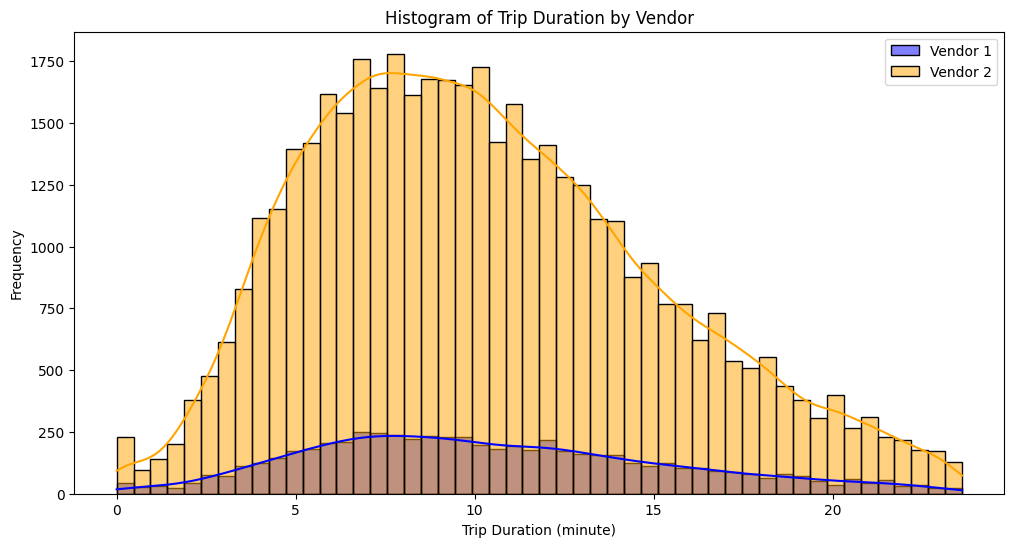

In [41]:
plt.figure(figsize=(12, 6))
sns.histplot(df[df['VendorID'] == 1]['trip_duration'], color='blue', label='Vendor 1', kde=True, bins=50)
sns.histplot(df[df['VendorID'] == 2]['trip_duration'], color='orange', label='Vendor 2', kde=True, bins=50)
plt.title('Histogram of Trip Duration by Vendor')
plt.xlabel('Trip Duration (minute)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

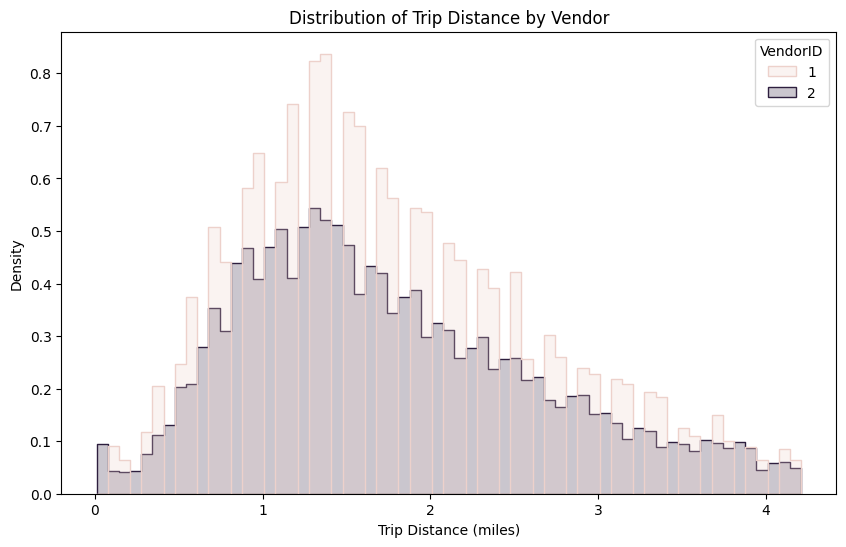

In [42]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='trip_distance', hue='VendorID', element='step', stat='density', common_norm=False)
plt.title('Distribution of Trip Distance by Vendor')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Density')
plt.show()

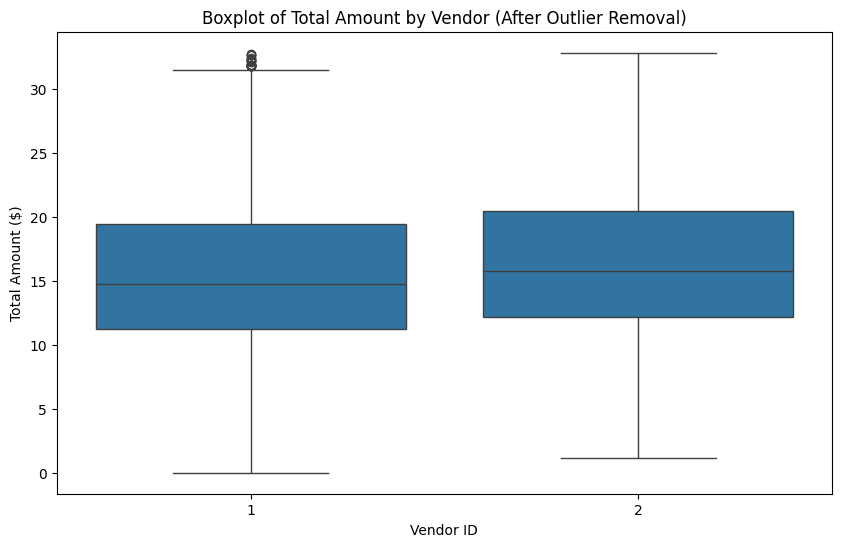

In [43]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='VendorID', y='total_amount')
plt.title('Boxplot of Total Amount by Vendor (After Outlier Removal)')
plt.xlabel('Vendor ID')
plt.ylabel('Total Amount ($)')
plt.show()


## Kesimpulan
## Jarak Perjalanan:
Distribusi menunjukkan kepadatan tinggi untuk perjalanan singkat sekitar 1 mil.
Vendor 1 memiliki frekuensi perjalanan singkat yang sedikit lebih tinggi dibandingkan Vendor 2.
Tidak ada perbedaan signifikan dalam jarak perjalanan antara kedua vendor (nilai p: 0.3406568093541569).

## Jumlah Total:
Terdapat perbedaan signifikan dalam jumlah total yang dikenakan antara Vendor 1 dan Vendor 2 (nilai p: 3.9838561972426194e-40).
Vendor 2 kemungkinan mengenakan biaya lebih tinggi dari rata-rata.

## Durasi Perjalanan:
Terdapat perbedaan signifikan dalam durasi perjalanan antara kedua vendor (nilai p: 0.001092858793665973).
Vendor 1 memiliki durasi perjalanan yang lebih lama dari rata-rata.

Durasi Perjalanan:

Vendor 1 dapat meningkatkan layanan untuk bersaing dengan Vendor 2 dalam hal durasi perjalanan yang lebih lama.
Vendor 2 mungkin perlu mengevaluasi efisiensi perjalanan untuk menghindari durasi perjalanan yang terlalu panjang.
Total Amount:

Vendor 2 perlu mengevaluasi strategi harga atau layanan untuk meningkatkan total amount yang diperoleh.
Vendor 1 harus mempertahankan atau meningkatkan strategi yang telah menyebabkan total amount yang lebih tinggi.

## Actionable Recommendation

Durasi Perjalanan:
Vendor 1 dapat meningkatkan layanan untuk bersaing dengan Vendor 2 dalam hal durasi perjalanan yang lebih lama.
Vendor 2 mungkin perlu mengevaluasi efisiensi perjalanan untuk menghindari durasi perjalanan yang terlalu panjang.

Total Amount:
Vendor 2 perlu mengevaluasi strategi harga atau layanan untuk meningkatkan total amount yang diperoleh.
Vendor 1 harus mempertahankan atau meningkatkan strategi yang telah menyebabkan total amount yang lebih tinggi.